In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [142]:
# Load the dataset
df = pd.read_csv("Transportation_Fuels_Production_and_Demand.csv")
pd.options.display.float_format = '{:,.2f}'.format


In [143]:
df.head()

,Date,East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day)
0,02/26/2021,2828,41.00,8301,8148,807
1,02/19/2021,2742,43.00,7736,7207,908
2,02/12/2021,2776,34.00,9031,8407,1147
3,02/05/2021,2713,41.00,8656,7857,1194
4,01/29/2021,2770,48.00,8420,7770,1252


In [144]:
# rename the column to demand
df['Demand'] = df['U.S. Gasoline Demand (Thousand Barrels per Day)']

In [145]:
df = df[['Date','Demand']]

In [146]:
df.head()

,Date,Demand
0,02/26/2021,8148
1,02/19/2021,7207
2,02/12/2021,8407
3,02/05/2021,7857
4,01/29/2021,7770


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
Date      1442 non-null object
Demand    1442 non-null int64
dtypes: int64(1), object(1)
memory usage: 22.6+ KB


In [148]:
df['Date'] = df['Date'].apply(pd.to_datetime)


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
Date      1442 non-null datetime64[ns]
Demand    1442 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 22.6 KB


In [150]:
df.sort_values(by='Date', ascending=True,inplace=True)

In [151]:
df.set_index('Date',inplace = True)

In [152]:
df3 = df

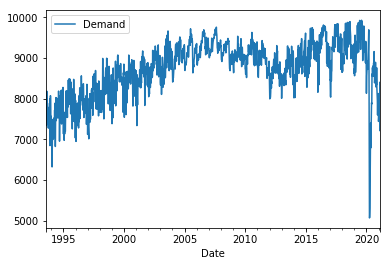

In [153]:
# Plot the time series
df.plot()
plt.show()

In [112]:
train=df[0:-113] 
test=df[-113:]

In [113]:
test

,Demand
Date,
2019-01-04,8735
2019-01-11,8565
2019-01-18,8868
2019-01-25,9564
2019-02-01,9073
2019-02-08,8648
2019-02-15,8800
2019-02-22,8981
2019-03-01,9062


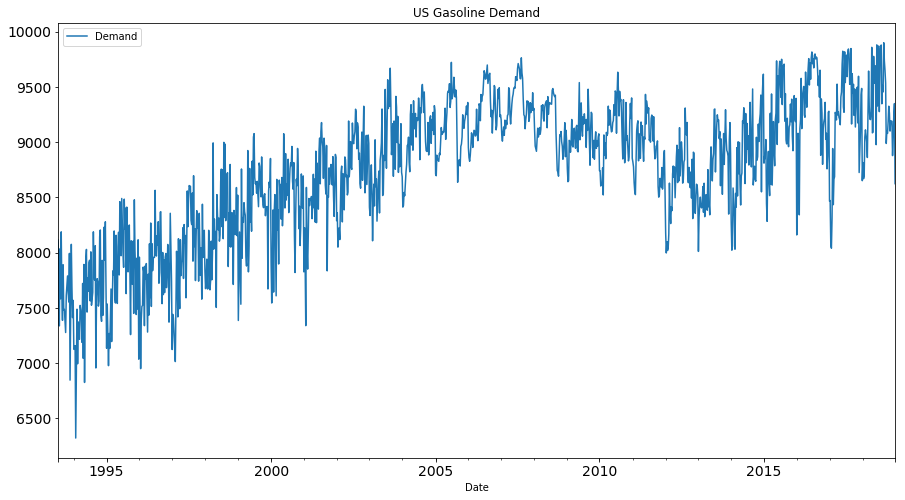

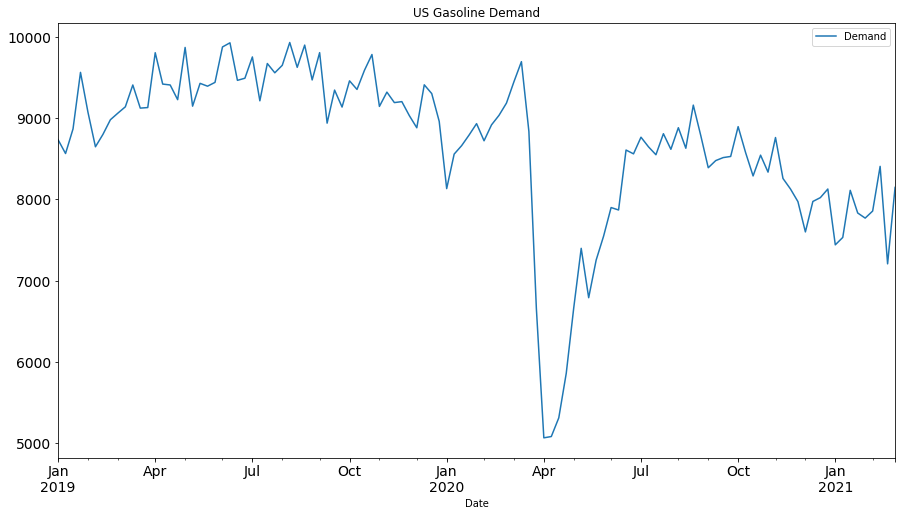

In [114]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'US Gasoline Demand', fontsize=14)
test.plot(figsize=(15,8), title= 'US Gasoline Demand', fontsize=14)
plt.show()


#### We observed no trend in the Target_Corporation dataset from the year 2016. 
#### The seasonal variations are present in the Target_Corporation dataset. 

### Moving average(12)

In [115]:
# the simple moving average over a period of 12 
df['SMA_12'] = df.Demand.rolling(12, min_periods=12).mean()

In [116]:
df.head(20)

,Demand,SMA_12
Date,,
1993-07-16,8113,nan
1993-07-23,7916,nan
1993-07-30,7336,nan
1993-08-06,8033,nan
1993-08-13,7581,nan
1993-08-20,8187,nan
1993-08-27,7629,nan
1993-09-03,7386,nan
1993-09-10,7889,nan


In [117]:
df.tail(50)

,Demand,SMA_12
Date,,
2020-03-20,8837,"8,910.17"
2020-03-27,6659,"8,787.33"
2020-04-03,5065,"8,496.25"
2020-04-10,5081,"8,197.83"
2020-04-17,5311,"7,907.67"
2020-04-24,5860,"7,651.58"
2020-05-01,6664,"7,480.08"
2020-05-08,7398,"7,353.42"
2020-05-15,6790,"7,166.33"


In [118]:
df1 = df

In [119]:
df1.head(20)

,Demand,SMA_12
Date,,
1993-07-16,8113,nan
1993-07-23,7916,nan
1993-07-30,7336,nan
1993-08-06,8033,nan
1993-08-13,7581,nan
1993-08-20,8187,nan
1993-08-27,7629,nan
1993-09-03,7386,nan
1993-09-10,7889,nan


Text(0, 0.5, 'Demand')

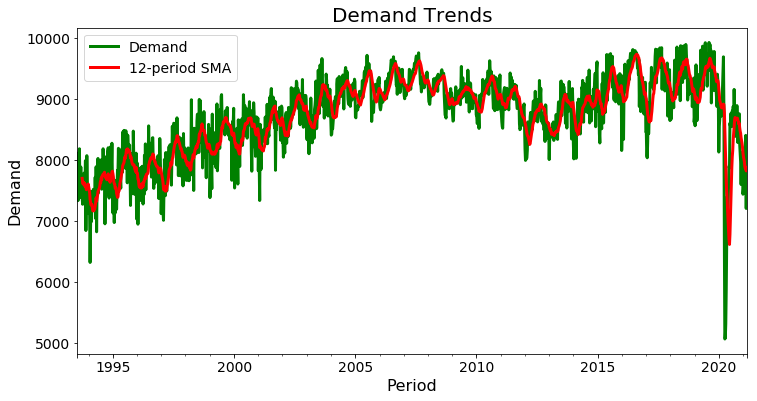

In [120]:
# colors for the line plot
colors = ['green', 'red']


# line plot for demand
df1.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand', '12-period SMA'], fontsize=14)

# title and labels
plt.title('Demand Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

In [121]:
df['Error_12']=df['Demand']-df['SMA_12']

In [122]:
df.head(20)

,Demand,SMA_12,Error_12
Date,,,
1993-07-16,8113,nan,nan
1993-07-23,7916,nan,nan
1993-07-30,7336,nan,nan
1993-08-06,8033,nan,nan
1993-08-13,7581,nan,nan
1993-08-20,8187,nan,nan
1993-08-27,7629,nan,nan
1993-09-03,7386,nan,nan
1993-09-10,7889,nan,nan


MAE 234.10
MSE 112,488.23
RMSE 335.39


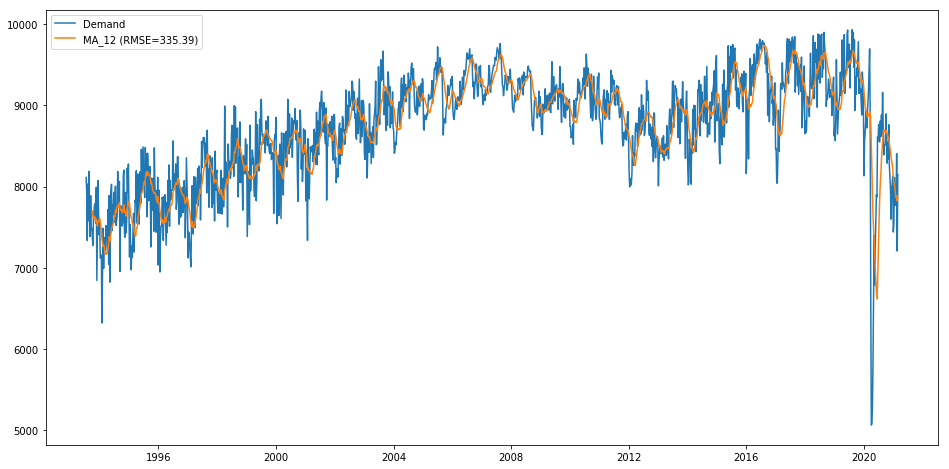

In [123]:
mae = mean_absolute_error(df.Demand[11:], df.SMA_12[11:])
mse=mean_squared_error(df.Demand[11:], df.SMA_12[11:])
rmse = sqrt(mean_squared_error(df.Demand[11:], df.SMA_12[11:]))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(df['Demand'], label='Demand')
plt.plot(df['SMA_12'], label='MA_12 (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()

## Exponential smoothing 
#### Simple Exponential Smoothing

MAE 701.81
MSE 1,068,902.37
RMSE 1,033.88
MAE 712.30
MSE 1,111,660.13
RMSE 1,054.35
MAE 743.77
MSE 1,216,810.00
RMSE 1,103.09


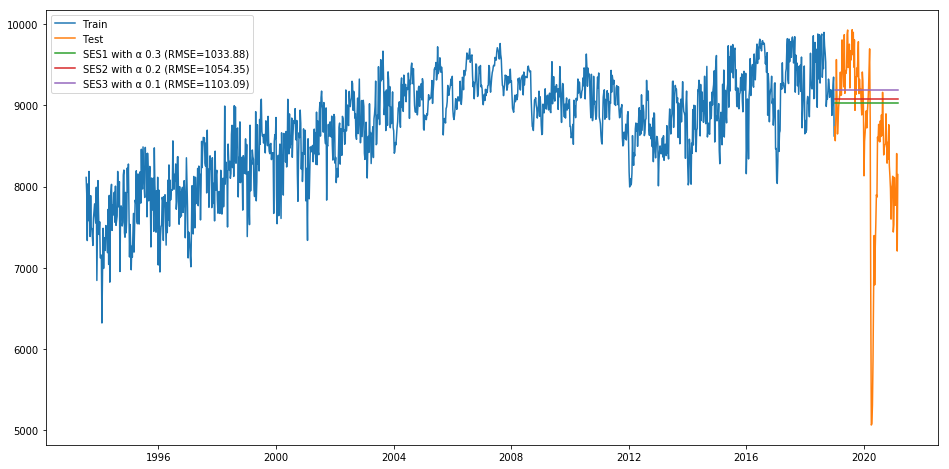

In [124]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.3,optimized=False)
fit22 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.2,optimized=False)
fit222 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.1,optimized=False)
pred['SES1'] = fit2.forecast(len(test))
pred['SES2'] = fit22.forecast(len(test))
pred['SES3'] = fit222.forecast(len(test))
# Calculate KPI's - 
mae1 = mean_absolute_error(test.Demand, pred.SES1)
mse1=mean_squared_error(test.Demand, pred.SES1)
rmse1 = sqrt(mean_squared_error(test.Demand, pred.SES1))
print("MAE {:,.2f}".format(mae1))
print("MSE {:,.2f}".format(mse1))
print("RMSE {:,.2f}".format(rmse1))

# Calculate KPI's
mae2 = mean_absolute_error(test.Demand, pred.SES2)
mse2=mean_squared_error(test.Demand, pred.SES2)
rmse2 = sqrt(mean_squared_error(test.Demand, pred.SES2))
print("MAE {:,.2f}".format(mae2))
print("MSE {:,.2f}".format(mse2))
print("RMSE {:,.2f}".format(rmse2))

# Calculate KPI's
mae3 = mean_absolute_error(test.Demand, pred.SES3)
mse3=mean_squared_error(test.Demand, pred.SES3)
rmse3 = sqrt(mean_squared_error(test.Demand, pred.SES3))
print("MAE {:,.2f}".format(mae3))
print("MSE {:,.2f}".format(mse3))
print("RMSE {:,.2f}".format(rmse3))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['SES1'], label='SES1 with α 0.3 (RMSE={:.2f})'.format(rmse1)) 
plt.plot(pred['SES2'], label='SES2 with α 0.2 (RMSE={:.2f})'.format(rmse2)) 
plt.plot(pred['SES3'], label='SES3 with α 0.1 (RMSE={:.2f})'.format(rmse3)) 
plt.legend()
plt.show()

In [125]:
pred

,Demand,SES1,SES2,SES3
Date,,,,
2019-01-04,8735,"9,023.58","9,079.60","9,192.41"
2019-01-11,8565,"9,023.58","9,079.60","9,192.41"
2019-01-18,8868,"9,023.58","9,079.60","9,192.41"
2019-01-25,9564,"9,023.58","9,079.60","9,192.41"
2019-02-01,9073,"9,023.58","9,079.60","9,192.41"
2019-02-08,8648,"9,023.58","9,079.60","9,192.41"
2019-02-15,8800,"9,023.58","9,079.60","9,192.41"
2019-02-22,8981,"9,023.58","9,079.60","9,192.41"
2019-03-01,9062,"9,023.58","9,079.60","9,192.41"


#### Double Exponential Smoothing (Holt)

MAE 1,726.43
MSE 3,647,557.26
RMSE 1,909.86
MAE 882.35
MSE 1,032,432.07
RMSE 1,016.09
MAE 2,743.31
MSE 9,444,349.99
RMSE 3,073.17


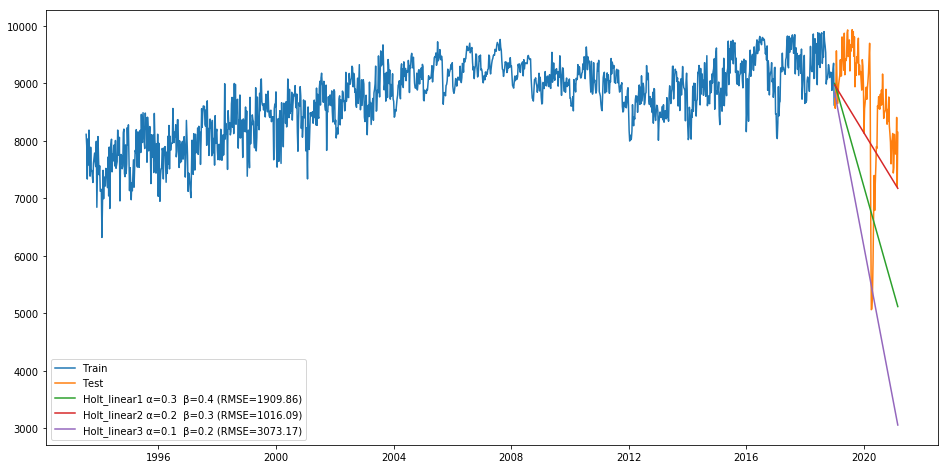

In [126]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
fit22 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.2,smoothing_slope = 0.3)
fit222 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.1,smoothing_slope = 0.2)
pred['Holt_linear1'] = fit2.forecast(len(test))
pred['Holt_linear2'] = fit22.forecast(len(test))
pred['Holt_linear3'] = fit222.forecast(len(test))
# Calculate KPI's - 
mae1 = mean_absolute_error(test.Demand, pred.Holt_linear1)
mse1=mean_squared_error(test.Demand, pred.Holt_linear1)
rmse1 = sqrt(mean_squared_error(test.Demand, pred.Holt_linear1))
print("MAE {:,.2f}".format(mae1))
print("MSE {:,.2f}".format(mse1))
print("RMSE {:,.2f}".format(rmse1))

# Calculate KPI's
mae2 = mean_absolute_error(test.Demand, pred.Holt_linear2)
mse2=mean_squared_error(test.Demand, pred.Holt_linear2)
rmse2 = sqrt(mean_squared_error(test.Demand, pred.Holt_linear2))
print("MAE {:,.2f}".format(mae2))
print("MSE {:,.2f}".format(mse2))
print("RMSE {:,.2f}".format(rmse2))

# Calculate KPI's
mae3 = mean_absolute_error(test.Demand, pred.Holt_linear3)
mse3=mean_squared_error(test.Demand, pred.Holt_linear3)
rmse3 = sqrt(mean_squared_error(test.Demand, pred.Holt_linear3))
print("MAE {:,.2f}".format(mae3))
print("MSE {:,.2f}".format(mse3))
print("RMSE {:,.2f}".format(rmse3))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_linear1'], label='Holt_linear1 α=0.3  β=0.4 (RMSE={:.2f})'.format(rmse1)) 
plt.plot(pred['Holt_linear2'], label='Holt_linear2 α=0.2  β=0.3 (RMSE={:.2f})'.format(rmse2)) 
plt.plot(pred['Holt_linear3'], label='Holt_linear3 α=0.1  β=0.2 (RMSE={:.2f})'.format(rmse3)) 
plt.legend()
plt.show()

In [127]:
pred

,Demand,Holt_linear1,Holt_linear2,Holt_linear3
Date,,,,
2019-01-04,8735,"8,997.19","8,970.97","8,834.05"
2019-01-11,8565,"8,962.57","8,954.93","8,782.50"
2019-01-18,8868,"8,927.94","8,938.89","8,730.95"
2019-01-25,9564,"8,893.32","8,922.85","8,679.39"
2019-02-01,9073,"8,858.69","8,906.81","8,627.84"
2019-02-08,8648,"8,824.07","8,890.77","8,576.29"
2019-02-15,8800,"8,789.44","8,874.73","8,524.73"
2019-02-22,8981,"8,754.82","8,858.69","8,473.18"
2019-03-01,9062,"8,720.20","8,842.65","8,421.63"


#### Triple Exponential Smoothing (Holt Winters)

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


MAE 624.70
MSE 753,653.19
RMSE 868.13


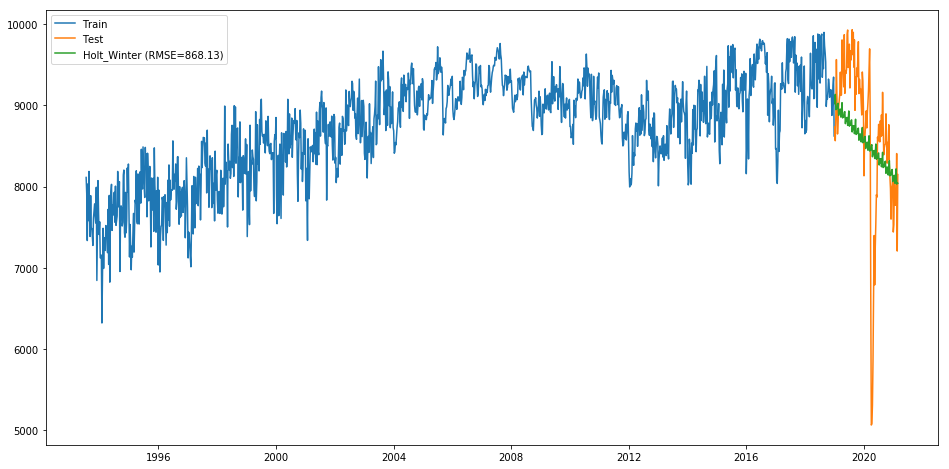

In [128]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Demand']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.Holt_Winter)
mse=mean_squared_error(test.Demand, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

In [129]:
pred

,Demand,Holt_Winter
Date,,
2019-01-04,8735,"9,021.81"
2019-01-11,8565,"9,135.25"
2019-01-18,8868,"8,947.76"
2019-01-25,9564,"8,966.02"
2019-02-01,9073,"8,958.43"
2019-02-08,8648,"9,015.61"
2019-02-15,8800,"9,025.56"
2019-02-22,8981,"8,876.84"
2019-03-01,9062,"8,950.55"


### Linear Regression

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


Coefficients: intercept    381.28
Demand.L1      0.22
Demand.L2      0.13
Demand.L3      0.11
Demand.L4      0.11
Demand.L5     -0.03
Demand.L6      0.07
Demand.L7     -0.01
Demand.L8      0.05
Demand.L9      0.01
Demand.L10    -0.03
Demand.L11     0.04
Demand.L12    -0.00
Demand.L13    -0.02
Demand.L14     0.02
Demand.L15    -0.03
Demand.L16     0.06
Demand.L17     0.06
Demand.L18    -0.06
Demand.L19    -0.03
Demand.L20     0.02
Demand.L21    -0.03
Demand.L22    -0.00
Demand.L23    -0.08
Demand.L24    -0.03
Demand.L25    -0.02
Demand.L26     0.02
Demand.L27     0.01
Demand.L28    -0.02
Demand.L29    -0.02
Demand.L30     0.02
Demand.L31     0.05
Demand.L32    -0.03
Demand.L33     0.04
Demand.L34    -0.01
Demand.L35     0.02
Demand.L36     0.04
Demand.L37     0.03
Demand.L38    -0.01
Demand.L39    -0.01
Demand.L40    -0.03
Demand.L41     0.02
Demand.L42    -0.00
Demand.L43     0.05
Demand.L44    -0.01
Demand.L45    -0.05
Demand.L46     0.03
Demand.L47    -0.05
Demand.L48     0.01
Demand

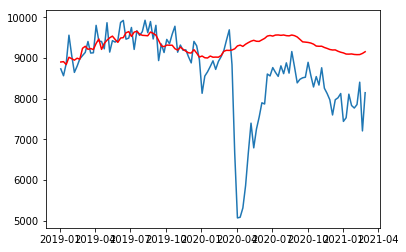

In [130]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
# train autoregression
pred = test.copy()
model = AutoReg(train, lags=53)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
pred['LR'] = model_fit.forecast(len(test))
mae = mean_absolute_error(test.Demand, pred.LR)
mse=mean_squared_error(test.Demand, pred.LR)
rmse = sqrt(mean_squared_error(test.Demand, pred.LR))
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test.Demand)
pyplot.plot(pred.LR, color='red')
pyplot.show()

## ARIMA

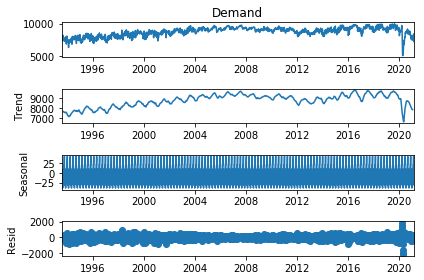

In [131]:
# Decompose the time series
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Demand'], freq=12)

# Plot decomposition
decomp.plot()
plt.show()

In [132]:
# Perform Dickey Fuller Test 
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Demand'])
# Print test statistic
print(result)



(-3.6123249528949555, 0.005529725916806704, 17, 1424, {'1%': -3.434950510599593, '5%': -2.8635718069244227, '10%': -2.5678517223401403}, 20222.584096912553)



### As dataset is stationary and P value is less than 5% as per the Dickey Fuller Test, we do not required to perform the difference  and We reject the null hypothesis as the P value is less than 5%

## Forecasting the series without seasonality

### Generate Prediction using your own values p= 2 and q=2

### Generating One Step Ahead Predictions in sample

In [156]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [167]:
df = df3

In [171]:
df

,Demand
Date,
1993-07-16,8113
1993-07-23,7916
1993-07-30,7336
1993-08-06,8033
1993-08-13,7581
1993-08-20,8187
1993-08-27,7629
1993-09-03,7386
1993-09-10,7889


In [168]:
model = SARIMAX(df3, order=(2,0,2))

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [172]:
results = model.fit()

# Print fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                 1442
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -10307.904
Date:                Thu, 08 Apr 2021   AIC                          20625.809
Time:                        00:17:18   BIC                          20652.178
Sample:                    07-16-1993   HQIC                         20635.651
                         - 02-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0005      0.001      0.336      0.737      -0.002       0.003
ar.L2          0.9992      0.001    725.256      0.000       0.996       1.002
ma.L1          0.4786      0.011     44.096      0.0

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [173]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-12-11   7,871.99
2020-12-18   7,923.63
2020-12-25   7,966.17
2021-01-01   8,045.95
2021-01-08   7,751.74
2021-01-15   7,646.13
2021-01-22   7,866.32
2021-01-29   7,852.34
2021-02-05   7,808.15
2021-02-12   7,833.38
2021-02-19   8,103.91
2021-02-26   7,677.77
Freq: W-FRI, Name: predicted_mean, dtype: float64


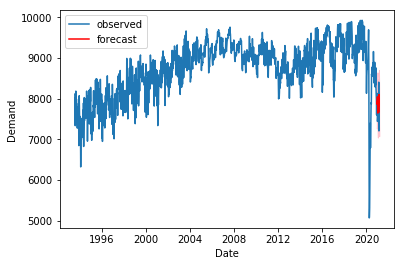

In [174]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Generated one step forecast and the values of forecasted and observed are pretty much same for last 12 weeks. So, the model is forecasting same as observed

#### Generate Dynamic Predictions

In [175]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-12-11   7,871.99
2020-12-18   7,874.28
2020-12-25   7,869.34
2021-01-01   7,871.63
2021-01-08   7,866.70
2021-01-15   7,868.98
2021-01-22   7,864.06
2021-01-29   7,866.34
2021-02-05   7,861.42
2021-02-12   7,863.69
2021-02-19   7,858.78
2021-02-26   7,861.05
Freq: W-FRI, Name: predicted_mean, dtype: float64


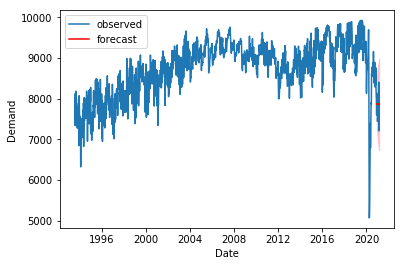

In [176]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### From Dynamic prediction, the forecasted values are in declining trend and the difference between forecast and observed values relatively higher.

#### Out of the Sample Predictions (12 periods ahead)

In [177]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2021-03-05   7,893.78
2021-03-12   7,902.04
2021-03-19   7,891.13
2021-03-26   7,899.38
2021-04-02   7,888.48
2021-04-09   7,896.72
2021-04-16   7,885.84
2021-04-23   7,894.06
2021-04-30   7,883.19
2021-05-07   7,891.40
2021-05-14   7,880.55
2021-05-21   7,888.75
Freq: W-FRI, Name: predicted_mean, dtype: float64


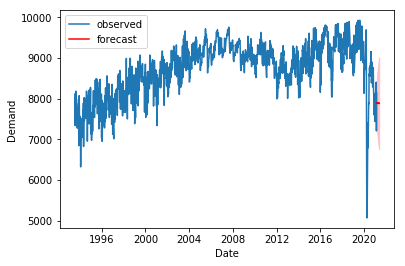

In [178]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### From out of sample prediction, we observe that the forecasted values are slightly declining over the next few weeks.

## Use the grid search method to calculate the parameter p and q

In [179]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequen

In [180]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q       AIC       BIC
8  2  2 20,604.71 20,636.35
5  1  2 20,621.75 20,648.12
7  2  1 20,625.05 20,651.42
4  1  1 20,630.61 20,651.70
6  2  0 20,655.89 20,676.99
3  1  0 20,838.17 20,853.99
2  0  2 21,492.95 21,514.05
1  0  1 21,931.13 21,946.95
0  0  0 22,820.34 22,830.89
   p  q       AIC       BIC
8  2  2 20,604.71 20,636.35
5  1  2 20,621.75 20,648.12
7  2  1 20,625.05 20,651.42
4  1  1 20,630.61 20,651.70
6  2  0 20,655.89 20,676.99
3  1  0 20,838.17 20,853.99
2  0  2 21,492.95 21,514.05
1  0  1 21,931.13 21,946.95
0  0  0 22,820.34 22,830.89


### We initially selected the values p=2 and q=2, and  grid search  providing the  values of p =1 and q=0 as AIC and BIC values are lowest. 

In [181]:
# Instantiate the model
arma = SARIMAX(df, order=(1,0,0))

C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\sharr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [182]:
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                 1442
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10468.896
Date:                Thu, 08 Apr 2021   AIC                          20941.791
Time:                        00:18:46   BIC                          20952.339
Sample:                    07-16-1993   HQIC                         20945.728
                         - 02-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001    926.338      0.000       0.997       1.001
sigma2      1.179e+05   3147.908     37.457      0.000    1.12e+05    1.24e+05
Ljung-Box (L1) (Q):                 220.18   Jarque-

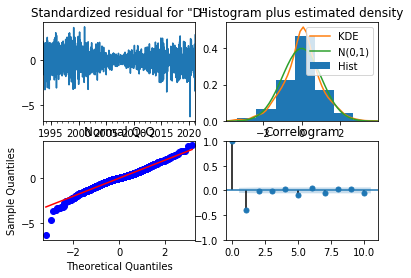

In [183]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

#### Generate one step forecast

In [184]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-12-11   7,594.17
2020-12-18   7,968.89
2020-12-25   8,015.85
2021-01-01   8,121.77
2021-01-08   7,435.30
2021-01-15   7,526.23
2021-01-22   8,105.78
2021-01-29   7,826.99
2021-02-05   7,764.04
2021-02-12   7,850.98
2021-02-19   8,400.55
2021-02-26   7,201.47
Freq: W-FRI, Name: predicted_mean, dtype: float64


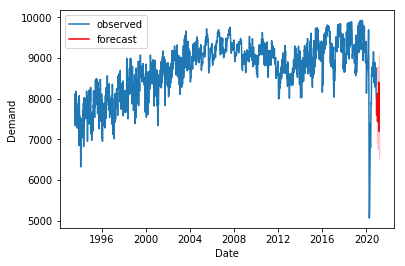

In [185]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Generated one step forecast and the values of forecasted and observed are pretty much same for last 12 weeks. So, the model is forecasting same as observed after finding the best values from grid search

#### Generate Dynamic Predictions

In [186]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-12-11   7,594.17
2020-12-18   7,588.35
2020-12-25   7,582.53
2021-01-01   7,576.72
2021-01-08   7,570.91
2021-01-15   7,565.11
2021-01-22   7,559.31
2021-01-29   7,553.51
2021-02-05   7,547.72
2021-02-12   7,541.94
2021-02-19   7,536.15
2021-02-26   7,530.38
Freq: W-FRI, Name: predicted_mean, dtype: float64


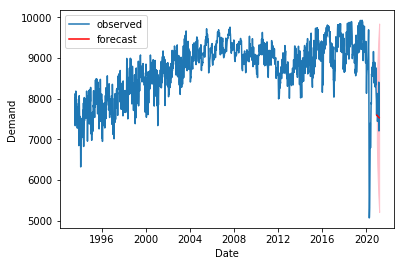

In [187]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### From Dynamic prediction, the forecasted values are in declining trend and the difference between forecast and observed values relatively higher.

#### Out of the Sample Predictions (12 periods ahead)

In [188]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2021-03-05   8,141.75
2021-03-12   8,135.51
2021-03-19   8,129.27
2021-03-26   8,123.04
2021-04-02   8,116.82
2021-04-09   8,110.59
2021-04-16   8,104.37
2021-04-23   8,098.16
2021-04-30   8,091.95
2021-05-07   8,085.75
2021-05-14   8,079.55
2021-05-21   8,073.36
Freq: W-FRI, Name: predicted_mean, dtype: float64


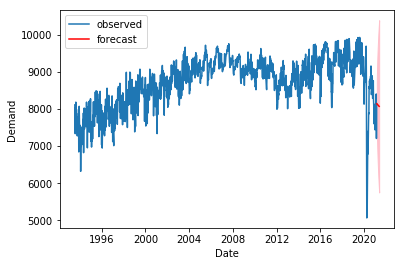

In [189]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### From out of sample prediction, we observe that the forecasted values are slightly declining over the next few weeks.

## Perform auto_arima with seasonality

In [197]:
pip install pmdarima

^C
Note: you may need to restart the kernel to use updated packages.


In [196]:
import pmdarima as pm
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

ModuleNotFoundError: No module named 'pmdarima'

In [191]:
# Check for seasonal parameters
model_s = pm.auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=53,
                           start_P=2, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_s.summary())

NameError: name 'pm' is not defined

### What parameters do you get?

 ####  ARIMA(1,0,1)(2,0,0)[53] intercept   : AIC=1759.776, Time=14.93 sec

### ARIMA provides 3 paramters namely p,d and q(non-seasonal part). Since, our dataset contain sensonal component we utilized SARIMAX and it has another set of parameters P, D, Q, m(seasonal part), where m denotes number of observations per year. After running the SARIMAX model we got the best parameter as ARIMA(1,0,1)(2,0,0)[53] - ARIMA(p,d,q)(P,D,Q)[m].

In [50]:
# Build the model
model = SARIMAX(df, order=(1, 0, 1), seasonal_order=(2, 0, 0, 53),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results = model.fit()
results.summary()

C:\Users\vinod\Anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\vinod\Anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Demand   No. Observations:                  260
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 53)   Log Likelihood                -506.121
Date:                             Sat, 20 Feb 2021   AIC                           1022.241
Time:                                     17:40:00   BIC                           1037.394
Sample:                                 02-21-2016   HQIC                          1028.396
                                      - 02-07-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.012     80.911      0.000       0.969       1.017
ma.L1         -0.5117      0.079     -6.450      0.000      -0.667      -0.356
ar.S.L53       0.5572      0.066      8.441      0.000       0.428       0.687
ar.S.L106     -0.1423      0.061     -2.348      0.019      -0.261      -0.024
sigma2        43.6455      2.042     21.371      0.000      39.643      47.648
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              1055.06
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             1.12
Prob(H) (two-sided):                  0.33   Kurtosis:                        15.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

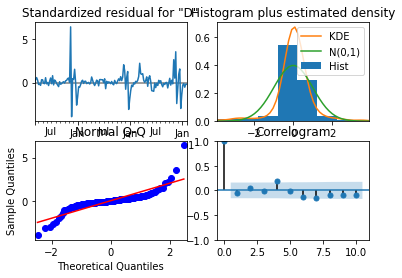

In [51]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

### Since seasonality factor is taken into account, the residuals are precisely satisfying the below conditions.
1. Standardized residual - No patterns found in the residuals graph.
2. Histogram plus KDE estimate - The KDE curve looks much more to a normal distribution.
3. Normal Q-Q - Majority of the data points lie on a straight line.
4. Correlogram - 95% of correlations for lag is not significant.

### Generate One Step Forecast with the plot for 12 previous entries

In [52]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-11-22   52.66
2020-11-29   76.78
2020-12-06   62.28
2020-12-13   55.67
2020-12-20   62.66
2020-12-27   72.51
2021-01-03   48.20
2021-01-10   38.89
2021-01-17   37.69
2021-01-24   38.44
2021-01-31   35.22
2021-02-07   35.17
Freq: W-SUN, Name: predicted_mean, dtype: float64


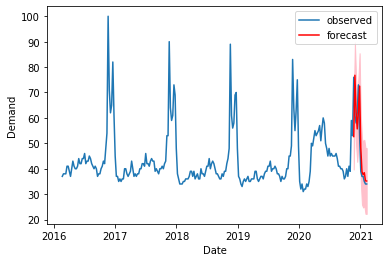

In [53]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Since the seasonality factor is involved and the best value of (p,d,q) (P,D,Q) obtained from the auto_arima function. So this One step Forecast method is forecasting very accurate to the observed values.

#### Generate Dynamic Predictions with the plot for 12 previous entries

In [54]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2020-11-22   52.66
2020-11-29   65.55
2020-12-06   58.72
2020-12-13   54.20
2020-12-20   58.15
2020-12-27   63.05
2021-01-03   48.20
2021-01-10   43.32
2021-01-17   43.00
2021-01-24   44.04
2021-01-31   42.44
2021-02-07   42.93
Freq: W-SUN, Name: predicted_mean, dtype: float64


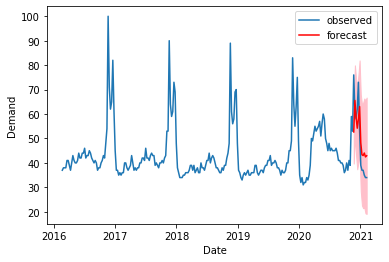

In [55]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Without the seasonality factor the dynamic prediction was not forecasting accurately. Since the seasonality factor is involved and the best value of (p,d,q) (P,D,Q) obtained from the auto_arima function. So, Generate Dynamic Predictions method is forecasting similar to the observed values

#### Out of the Sample Predictions with the plot for 24 steps

In [56]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

2021-02-14   34.17
2021-02-21   34.99
2021-02-28   34.43
2021-03-07   35.25
2021-03-14   37.20
2021-03-21   43.46
2021-03-28   42.76
2021-04-04   44.15
2021-04-11   45.68
2021-04-18   44.42
2021-04-25   44.41
2021-05-02   44.83
Freq: W-SUN, Name: predicted_mean, dtype: float64


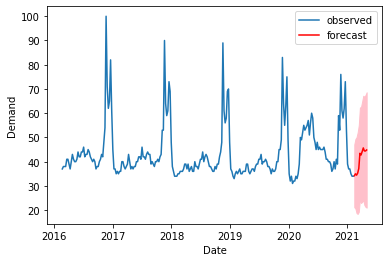

In [57]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Without the seasonality factor the Out of the Sample Predictions was not predicting accurately. auto_arima function helped to find the best parameter values for non-seasonal and seasonal. Using these parameters, the Out of sample method is predicting precisely for next 12 weeks.